# 주성분 분석

#### 데이터의 속성 --> '특성'
#### 하나의 이미지는 몇 개의 특성으로 이루어져 있음
####      *100*100이 하나의 이미지라면 총 10000개의 픽셀로 이루어진 데이터임*
#### 이러한 특성을 '차원'이라고 함
#### 차원을 줄여보기 --> 메모리 절약, 연산속도 up
#### 단 정확히 줄여주어야 데이터가 흐트러지지 않음

#### 데이터를 가장 잘 나타내는 일부 특성을 선택 --> 차원 축소 알고리즘
#### 원복이 가능해야 함 (줄어든 차원을 다시 원복하기 등)
## 주성분 분석, 대표적으로 PCA 알고리즘

In [39]:
# 분산이 큰 방향을 찾는 과정....
# - 분산 : 데이터가 퍼져 있는 정도

In [40]:
! pip install wget
import wget
url= 'https://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [41]:
# 주어진 데이터가 3차원  ->  300 100 100 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits =  np.load('fruits_300_data')
fruits.shape, type(fruits)

((300, 100, 100), numpy.ndarray)

In [42]:
fruits2 = fruits.reshape(-1,100*100)
fruits2.shape

(300, 10000)

In [43]:
from sklearn.decomposition import PCA
# n_components : 주성분의 수
pca = PCA(n_components=50)
pca.fit(fruits2)

PCA(n_components=50)

In [44]:
# PCA가 찾은 주성분의 개수는 components 로 확인
pca.components_.shape # 픽셀이 만개가 있어야 하나의 이미지를 생성

(50, 10000)

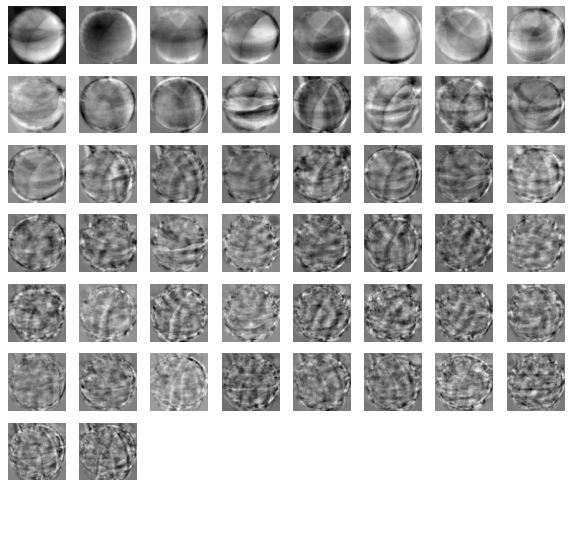

In [45]:
# pca.components_[0].reshape(-1,100,100).shape
# plt.imshow(pca.components_[49].reshape(-1,100,100)[0], cmap='gray_r')
# 300개의 샘플 이미지를 주성분 50개로 설정하여 줄임

fig, axs =  plt.subplots(8,8, figsize=(10,10)) # 10개씩 5줄
count = 0
for i in range(8):
    for j in range(8):
        if count < 50:
            axs[i,j].imshow(pca.components_[i*8+j].reshape(-1,100,100)[0], cmap='gray_r')
        axs[i,j].axis('off')
        count += 1
plt.show()

# 주요한 성분 n개만 추출한 데이터를 활용하는 것이 목적

In [46]:
# 주성분을 원본 데이터에 적용해서 차수 줄여주기
# 300개짜리 원래 데이터로 돌려놓은 fruits2 이용

fruitPca = pca.transform(fruits2)
len(fruitPca)

300

In [47]:
fruitPca.shape

(300, 50)

In [48]:
# 손실이 없을 수는 없으나 최소화.... 10000 -> 50으로 줄이면서 어느 정도의 손실은 발생

In [49]:
fruitPcaInverse = pca.inverse_transform(fruitPca) # 원복
fruitPcaInverse.shape

(300, 10000)

In [50]:
tryOriginal = fruitPcaInverse.reshape(-1,100,100) # 원복 데이터 이미지화
tryOriginal.shape

(300, 100, 100)

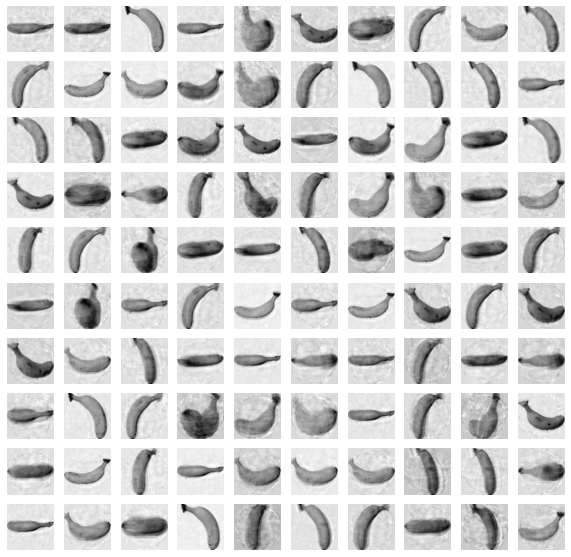

In [51]:
fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(tryOriginal[i*10+j+200], cmap='gray_r')
        # +100 : 파인애플   +200 : 바나나 
        axs[i,j].axis('off')
plt.show()

# 만개의 픽셀을 가진 50개의 이미지

In [52]:
pca.components_.shape

(50, 10000)

In [53]:
# 설명된 분산
pca.explained_variance_ratio_.sum()
# 92%가 넘는 분산을 유지 --> 위의 결과처럼 차수를 줄였음에도 이미지를 잘 표현함

0.9215241843044695

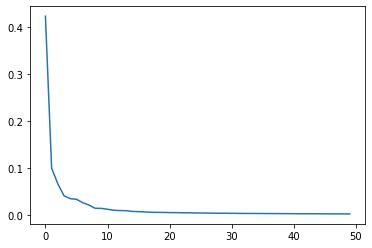

In [54]:
plt.plot(pca.explained_variance_ratio_)
plt.show() # 분산의 비율 그래프로 그리기

### *전체 중 대략 0~10개의 주성분이 대부분의 분산을 차지함*

In [67]:
# 분류 알고리즘을 이용해서 축소한 것과 원본일 때 잘 분류하는지 비교 (지도 학습)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

In [68]:
# 정답 데이터 생성 (지도 학습으로 분류해야 하므로)
y = np.array([0]*100 + [1]*100 + [2]*100)

In [69]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
x = fruits2
# 원본 검증
from sklearn.model_selection import cross_validate
cv = cross_validate(lr, x, y)
cv['test_score'].mean(), cv['fit_time'].mean()

(0.9966666666666667, 1.0585972309112548)

In [71]:
cv2 = cross_validate(lr, fruitPca ,y) # (알고리즘 모델, 학습데이터, 정답데이터)
cv2['test_score'].mean(), cv2['fit_time'].mean()

# 50개의 데이터로 차수를 낮춰줬을 때의 결과 --> 정확도 up, 속도 up
# 중요하지 않은 데이터를 버려줬기 때문에 오히려 정확도가 증가함

(1.0, 0.07559895515441895)

In [72]:
# PCA 할 때 분산의 개수 값을 줄 수도, 비율도 줄 수 있음
# n_components=정수 : 줄이고자 하는 차수
# n_components=실수 : 비율
#     ex. n_components=0.5 --> 설명된 분산의 50%에 달하도록 주성분을 찾아줌
pca05 = PCA(n_components=0.5)
pca05.fit(fruits2)

PCA(n_components=0.5)

In [73]:
pca05.n_components_
# 위의 데이터는 2개의 특성만으로 50%를 표현할 수 있음

# n_components_ : 계산 후의 머신러닝 컴포넌트 개수 반환
# n_components : 머신러닝을 적용할 때의 파라미터 값 반환

2

In [74]:
# pca05 = PCA() # 디폴드값 공백으로 줌
# pca05.n_components = 0.5 # 확률값 적용
# pca05.fit(fruits2)
# pca05.n_components_ # 확률로 계산한 후의 컴포넌트 개수 반환

# 이렇게 50%를 주어도 되고 위 객체로 50%를 주어도 됨

In [75]:
# pca05 = PCA() # 만약 PCA 파라미터값을 공백으로 주고 바로 반환하면?
# print(pca05.n_components) # None 반환

In [76]:
# 50% 로 축소했을 때 주성분은 2개가 됨
# 검증하기
fruits_05 = pca05.transform(fruits2) # 학습했던 데이터 대입
fruits_05.shape

(300, 2)

In [77]:
# pca05는 차원을 축소하기 위한 것이고 검증을 위한 데이터로 머신러닝 모델을 적용해야 함
x = fruits_05 # 50%로 축소해서 주성분이 2개 나온 x데이터
cv = cross_validate(lr, x, y)
cv['test_score'].mean(), cv['fit_time'].mean()

# max_iter에 관한 경고를 없애주기 위해서는
# PCA는 max_iter() 매개변수가 없으므로 로지스틱 회귀에서 값을 주거나,
# 데이터를 표준화 하여 scaling 해 주면 됨

(0.9966666666666667, 0.131592321395874)

## 평균을 수동으로 (0316) 하는 것이 아니라 KMeans 활용하여 구해보기

In [78]:
from sklearn.cluster import KMeans

In [79]:
km = KMeans(n_clusters=3, random_state=42) # 모델 만들기
km.fit(x) # x로 치환해 준 fruits2 데이터 

KMeans(n_clusters=3, random_state=42)

In [80]:
km.labels_ # label_ 등급을 어떻게 나누었는지 보여주는 객체
# n_cluster값을 3으로 지정했기 때문에 알아서 나누어 준 것

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
# 보다 간편히 확인하기
np.unique(km.labels_, return_counts=True) # 분류 등급과 각각의 개수 반환

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

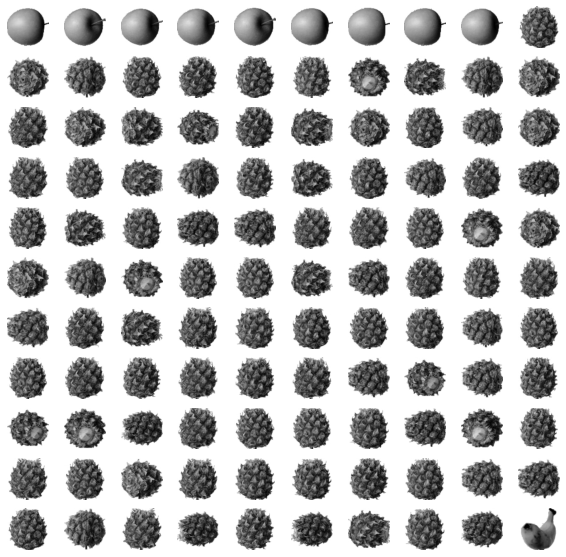

In [90]:
# 시각화 하기
# 0을 그려서 0, 1, 2를 각각 어떻게 분류했는지 보기 (0 : 110개)

target = fruits[km.labels_ == 0]
# len(target) --> 110

fig, axs =  plt.subplots(11,10, figsize=(10,10))
for i in range(11):
    for j in range(10):
        axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# km_labels_에서 모델이 0 이라고 판단한 과일을 출력
# 대부분 파인애플이 출력된 것으로 보아 파인애플을 0으로 분류한 것을 알 수 있음
# 0의 맨 앞 부분은 2이므로 사과는 2, 나머지 바나나는 1로 분류됨 

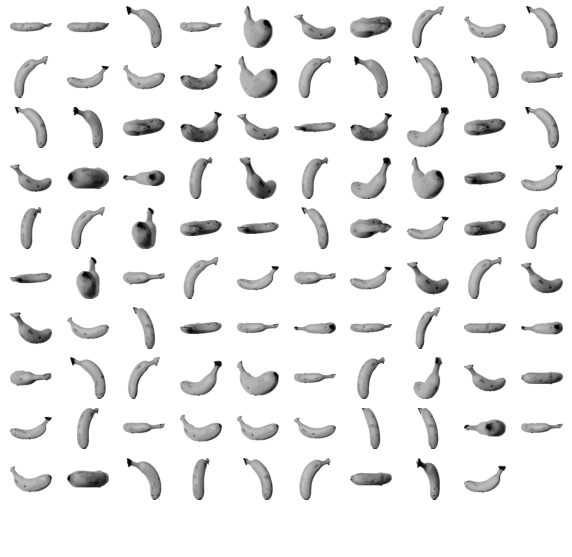

In [91]:
# 위에서 분류된 바나나(1) 그려보기 (1 : 99개)

target = fruits[km.labels_ == 1]

fig, axs =  plt.subplots(11,10, figsize=(10,10))
for i in range(11):
    for j in range(10):
        if i*10+j < 99: # 인덱스는 0부터 시작하므로 0부터 세어주기 때문에 -1
            axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

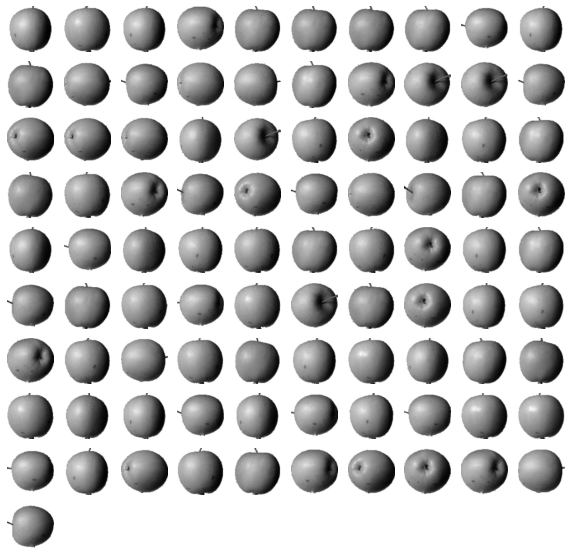

In [92]:
# 위에서 분류된 사과(2) 그려보기 (사과 : 91개)

target = fruits[km.labels_ == 2]

fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if i*10+j < 91:
            axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [93]:
# 훈련데이터의 차원을 줄이면 얻을 수 있는 장점  --> 시각화(화면 출력)하여 클러스트의 형태를 보기 편함
# 차원을 줄인 데이터로 시각화 하기
x.shape # fruits05

(300, 2)

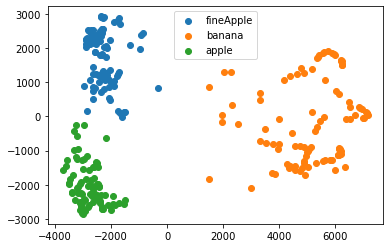

In [95]:
for i in range(3): # 0, 1, 2
    data = x[km.labels_ == i]
    # 2개의 열을 어떻게 x,y로 나누어도 상관없음 (여기에서는 첫번째 열을 x축으로 지정)
    plt.scatter(data[:,0], data[:,1])
plt.legend(['fineApple', 'banana', 'apple']) # 범례 : 리스트 형태로 값을 주어야 함
plt.show()
# 군집 출력

In [96]:
# KMeans는 군집이 잘 되었는지를 보기 위한 클래스
# km을 가지고 3개의 군집으로 분류했을 때, 로지스틱 회귀로 99%가 나옴
# 군집 2개, 즉 50%로 차원값을 줄여주었을 때 결과값이 매우 잘 출력됨

cv['test_score'].mean(), cv['fit_time'].mean()

(0.9966666666666667, 0.131592321395874)